In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import torch
import torchvision
from torch import nn
from torch.utils.data import DataLoader
from torchvision import transforms
from tqdm import tqdm

from torchlake.common.utils.convert import img_tensor_to_np
from torchlake.common.utils.plot import plot_grids
from torchlake.image_generation.models import GanDiscriminator, GanGenerator

# Setting

In [ ]:
IMAGE_SIZE = 28
BATCH_SIZE = 32

In [ ]:
artifact_path = Path("../data/gan")
data_path = Path("../data/fashionMnist")

In [ ]:
device = torch.device("cuda:0")

# Data

In [ ]:
preprocess = transforms.Compose(
    [
        transforms.ToTensor(),
    ]
)

In [2]:
train_data = torchvision.datasets.FashionMNIST(
    root=data_path.as_posix(),
    train=True,
    transform=preprocess,
)

In [3]:
train_loader = DataLoader(
    train_data,
    batch_size=BATCH_SIZE,
    shuffle=True,
    drop_last=True,
)

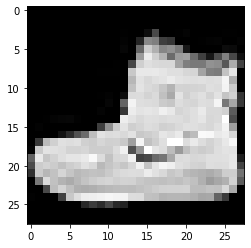

In [7]:
# 資料集繪圖
plt.imshow(img_tensor_to_np(train_data[0][0]), cmap="gray")

# train

In [41]:
generator = GanGenerator(128, 28).to(device)
discriminator = GanDiscriminator(28).to(device)

In [ ]:
LR = 1e-4
BETA = (0.5, 0.999)

In [42]:
criterion = nn.BCEWithLogitsLoss()
optim_G = torch.optim.Adam(generator.parameters(), lr=LR, betas=BETA)
optim_D = torch.optim.Adam(discriminator.parameters(), lr=LR, betas=BETA)

In [43]:
epoches = 10

In [ ]:
def generate_gaussian_noise(batch_size: int, latent_dim: int) -> torch.Tensor:
    noise = torch.empty((batch_size, latent_dim)).to(device).normal_(0, 1)

    return noise

In [44]:
generator.train()
discriminator.train()
for e in range(epoches):
    running_loss_G = 0.0
    running_loss_D = 0.0

    for img, _ in tqdm(train_loader):
        img = img.to(device)

        valid = torch.ones(BATCH_SIZE, 1).to(device)
        fake = torch.zeros(BATCH_SIZE, 1).to(device)

        noise = generate_gaussian_noise(BATCH_SIZE, 128)

        optim_G.zero_grad()
        gen_img = generator(noise)
        g_loss = criterion(discriminator(gen_img), valid)
        g_loss.backward()
        optim_G.step()
        running_loss_G += g_loss.item()

        optim_D.zero_grad()
        real_loss = criterion(discriminator(img), valid)
        fake_loss = criterion(discriminator(gen_img.detach()), fake)
        d_loss = (real_loss + fake_loss) / 2
        d_loss.backward()
        optim_D.step()
        running_loss_D += d_loss.item()

    print(
        f"epoch {e+1}: D:{running_loss_D/len(train_data)} G:{running_loss_G/len(train_data)}"
    )

  0%|                                                                                         | 0/1875 [00:00<?, ?it/s]

epoch 1: D:0.014850241436560949 G:0.03839094500641028


  0%|                                                                                         | 0/1875 [00:00<?, ?it/s]

epoch 2: D:0.010248260543743769 G:0.054277613025903705


  0%|                                                                                         | 0/1875 [00:00<?, ?it/s]

epoch 3: D:0.008747929293165604 G:0.0625204027523597


  0%|                                                                                         | 0/1875 [00:00<?, ?it/s]

epoch 4: D:0.007603279029826323 G:0.06980728241006533


  0%|                                                                                         | 0/1875 [00:00<?, ?it/s]

epoch 5: D:0.006960843969446917 G:0.07615012829701105


  0%|                                                                                         | 0/1875 [00:00<?, ?it/s]

epoch 6: D:0.007282066825218499 G:0.08147729963362217


  0%|                                                                                         | 0/1875 [00:00<?, ?it/s]

epoch 7: D:0.006202638017820815 G:0.08380717078546683


  0%|                                                                                         | 0/1875 [00:00<?, ?it/s]

epoch 8: D:0.005387720076429348 G:0.09490929176708063


  0%|                                                                                         | 0/1875 [00:00<?, ?it/s]

epoch 9: D:0.005358718479952464 G:0.09521899606585503


  0%|                                                                                         | 0/1875 [00:00<?, ?it/s]

epoch 10: D:0.0052589114376964665 G:0.0981547423457106


  0%|                                                                                         | 0/1875 [00:00<?, ?it/s]

epoch 11: D:0.005000538474608523 G:0.10151847849090893


  0%|                                                                                         | 0/1875 [00:00<?, ?it/s]

epoch 12: D:0.004945008026684324 G:0.1007902941574653


  0%|                                                                                         | 0/1875 [00:00<?, ?it/s]

epoch 13: D:0.005130043115528921 G:0.10549757645030816


  0%|                                                                                         | 0/1875 [00:00<?, ?it/s]

epoch 14: D:0.005217927267883594 G:0.10517424363791943


  0%|                                                                                         | 0/1875 [00:00<?, ?it/s]

epoch 15: D:0.006393464158289134 G:0.09103524219493071


  0%|                                                                                         | 0/1875 [00:00<?, ?it/s]

epoch 16: D:0.005295632542824994 G:0.09770773913661639


  0%|                                                                                         | 0/1875 [00:00<?, ?it/s]

epoch 17: D:0.0052142725815375645 G:0.10383398607969284


  0%|                                                                                         | 0/1875 [00:00<?, ?it/s]

epoch 18: D:0.004443744142477711 G:0.10741658901075522


  0%|                                                                                         | 0/1875 [00:00<?, ?it/s]

epoch 19: D:0.0054314427747856825 G:0.10276328181723754


100%|██████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:35<00:00, 52.47it/s]

epoch 20: D:0.005409983660032352 G:0.10146186018437148


# evaluation

In [14]:
# 區別是否為真實圖片
generator.eval()
discriminator.eval()
with torch.no_grad():
    hits = 0.0
    for img, _ in tqdm(train_loader):
        img = img.to(device)
        hits += discriminator(img).sum().item()

    print(hits / len(train_data))

100%|█████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:04<00:00, 445.16it/s]

1.0


In [15]:
# 區別是否為合成圖片
generator.eval()
discriminator.eval()
with torch.no_grad():
    hits = 0.0
    for img, label in tqdm(train_loader):
        noise = generate_gaussian_noise(BATCH_SIZE, 128)
        gen_img = generator(noise)
        hits += discriminator(gen_img).sum().item()
    print(hits / len(train_data))

100%|█████████████████████████████████████████████████████████████████████████████| 1875/1875 [00:05<00:00, 346.71it/s]

0.9998


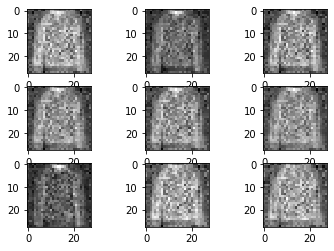

In [45]:
# 合成圖片
generator.eval()
with torch.no_grad():
    noise = generate_gaussian_noise(9, 128)
    gen_img = generator(noise)
    
    plot_grids(
        img_tensor_to_np(gen_img),
        nrow=3,
        ncol=3,
    )

model_path = artifact_path / 'gan.pth'

In [13]:
torch.save(generator.state_dict(), model_path.as_posix())